In [107]:
import pandas as pd
df_bb = pd.read_csv('./backblaze_ST4000DM000/model_2018_ST4000DM000.csv')
df_bb.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2018-01-01,Z3016TK2,ST4000DM000,4000787030016,0,115.0,87117728.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,W300GLSS,ST4000DM000,4000787030016,1,111.0,40108520.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,Z302SXQ0,ST4000DM000,4000787030016,0,119.0,208926768.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,Z3025L3F,ST4000DM000,4000787030016,1,111.0,30947064.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,Z302SW9C,ST4000DM000,4000787030016,0,117.0,137764288.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df_bb_raw = df_bb[df_bb.columns.drop(list(df_bb.filter(regex='normalized')))]
feat_raw = df_bb_raw.columns.values
print("Dataset with raw features values", feat_raw)
print(df_bb_raw.shape)

Dataset with raw features values ['date' 'serial_number' 'model' 'capacity_bytes' 'failure' 'smart_1_raw'
 'smart_2_raw' 'smart_3_raw' 'smart_4_raw' 'smart_5_raw' 'smart_7_raw'
 'smart_8_raw' 'smart_9_raw' 'smart_10_raw' 'smart_11_raw' 'smart_12_raw'
 'smart_13_raw' 'smart_15_raw' 'smart_22_raw' 'smart_177_raw'
 'smart_179_raw' 'smart_181_raw' 'smart_182_raw' 'smart_183_raw'
 'smart_184_raw' 'smart_187_raw' 'smart_188_raw' 'smart_189_raw'
 'smart_190_raw' 'smart_191_raw' 'smart_192_raw' 'smart_193_raw'
 'smart_194_raw' 'smart_195_raw' 'smart_196_raw' 'smart_197_raw'
 'smart_198_raw' 'smart_199_raw' 'smart_200_raw' 'smart_201_raw'
 'smart_220_raw' 'smart_222_raw' 'smart_223_raw' 'smart_224_raw'
 'smart_225_raw' 'smart_226_raw' 'smart_235_raw' 'smart_240_raw'
 'smart_241_raw' 'smart_242_raw' 'smart_250_raw' 'smart_251_raw'
 'smart_252_raw' 'smart_254_raw' 'smart_255_raw']
(380078, 55)


In [109]:
df_bb_raw.isnull().sum()

date                   0
serial_number          0
model                  0
capacity_bytes         0
failure                0
smart_1_raw           16
smart_2_raw       380078
smart_3_raw           16
smart_4_raw           16
smart_5_raw           16
smart_7_raw           16
smart_8_raw       380078
smart_9_raw           16
smart_10_raw          16
smart_11_raw      380078
smart_12_raw          16
smart_13_raw      380078
smart_15_raw      380078
smart_22_raw      380078
smart_177_raw     380078
smart_179_raw     380078
smart_181_raw     380078
smart_182_raw     380078
smart_183_raw         16
smart_184_raw         16
smart_187_raw         16
smart_188_raw         16
smart_189_raw         16
smart_190_raw         16
smart_191_raw         16
smart_192_raw         16
smart_193_raw         16
smart_194_raw         16
smart_195_raw     380078
smart_196_raw     380078
smart_197_raw         16
smart_198_raw         16
smart_199_raw         16
smart_200_raw     380078
smart_201_raw     380078


In [110]:
columns_with_values = df_bb_raw.columns[df_bb_raw.isnull().sum() <= 30000]
df_bb_raw = df_bb_raw[columns_with_values]
df_bb_raw.isnull().sum()

date               0
serial_number      0
model              0
capacity_bytes     0
failure            0
smart_1_raw       16
smart_3_raw       16
smart_4_raw       16
smart_5_raw       16
smart_7_raw       16
smart_9_raw       16
smart_10_raw      16
smart_12_raw      16
smart_183_raw     16
smart_184_raw     16
smart_187_raw     16
smart_188_raw     16
smart_189_raw     16
smart_190_raw     16
smart_191_raw     16
smart_192_raw     16
smart_193_raw     16
smart_194_raw     16
smart_197_raw     16
smart_198_raw     16
smart_199_raw     16
smart_240_raw     16
smart_241_raw     16
smart_242_raw     16
dtype: int64

In [111]:
df_bb_raw = df_bb_raw.dropna()
df_bb_raw.shape

(380062, 29)

In [112]:
df = df_bb_raw
df = df.filter(['date','serial_number','smart_5_raw', 'smart_187_raw', 'smart_197_raw', 'failure'])
df = df.groupby(['serial_number'], group_keys=True).apply(lambda x: x)
df.head()

date serial_number  smart_5_raw  smart_187_raw  \
serial_number                                                                
S3000A9T      238794  2018-10-01      S3000A9T          0.0            0.0   
              241913  2018-10-02      S3000A9T          0.0            0.0   
              244983  2018-10-03      S3000A9T          0.0            0.0   
              248021  2018-10-04      S3000A9T          0.0            0.0   
              251021  2018-10-05      S3000A9T          0.0            0.0   

                      smart_197_raw  failure  
serial_number                                 
S3000A9T      238794            0.0        0  
              241913            0.0        0  
              244983            0.0        0  
              248021            0.0        0  
              251021            0.0        0

In [113]:
smart_5_shifted = df['smart_5_raw'].shift()
smart_5_shifted[0] = 0
df['5_diff'] = 0
df['5_diff'] = df['smart_5_raw'] - smart_5_shifted

smart_187_shifted = df['smart_187_raw'].shift()
smart_187_shifted[0] = 0
df['187_diff'] = 0
df['187_diff'] = df['smart_187_raw'] - smart_187_shifted

smart_197_shifted = df['smart_197_raw'].shift()
smart_197_shifted[0] = 0
df['197_diff'] = 0
df['197_diff'] = df['smart_197_raw'] - smart_197_shifted
df.head()

date serial_number  smart_5_raw  smart_187_raw  \
serial_number                                                                
S3000A9T      238794  2018-10-01      S3000A9T          0.0            0.0   
              241913  2018-10-02      S3000A9T          0.0            0.0   
              244983  2018-10-03      S3000A9T          0.0            0.0   
              248021  2018-10-04      S3000A9T          0.0            0.0   
              251021  2018-10-05      S3000A9T          0.0            0.0   

                      smart_197_raw  failure  5_diff  187_diff  197_diff  
serial_number                                                             
S3000A9T      238794            0.0        0     0.0       0.0       0.0  
              241913            0.0        0     0.0       0.0       0.0  
              244983            0.0        0     0.0       0.0       0.0  
              248021            0.0        0     0.0       0.0       0.0  
              251021            0.0        0     0.0       0.0       0.0

In [114]:
df['5_diff'].value_counts()

 0.0      379705
 8.0          87
-8.0          36
 16.0         26
 24.0         13
           ...  
 168.0         1
 368.0         1
 544.0         1
 576.0         1
-320.0         1
Name: 5_diff, Length: 112, dtype: int64

## Creating model

In [115]:
from sklearn.ensemble import IsolationForest

IF_FDR = IsolationForest(contamination=0.01)

IF_FAR = IsolationForest(contamination=0.0002)

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

df1 = df

df1 = df1[df1['date'] == "2018-01-01"]
df1.shape

df1['serial_number_int'] = pd.Categorical(df1['serial_number']).codes
df1.head()
X = df1.drop(['failure','date','serial_number'], axis=1)
y = df1['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

C:\Users\katevi\AppData\Local\Temp\ipykernel_11896\4192053065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['serial_number_int'] = pd.Categorical(df1['serial_number']).codes


In [117]:
IF_FDR.fit(X_train)
IF_FAR.fit(X_train)

C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.0002)

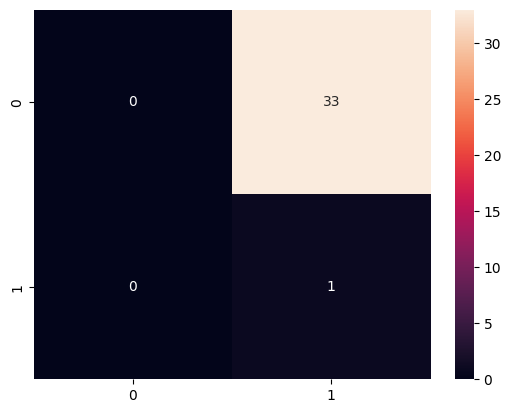

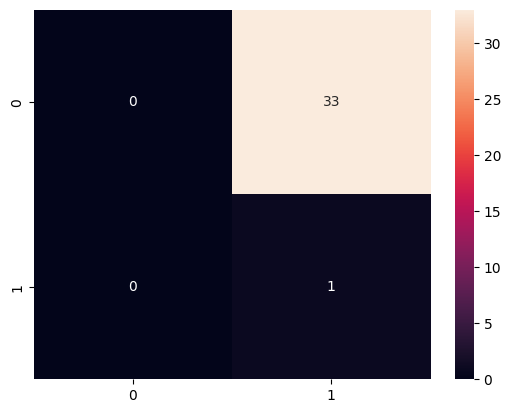

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_test = IF_FDR.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f')
plt.show()

y_pred_test_far = IF_FAR.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_test_far), annot=True, fmt='.0f')
plt.show()
